In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 6.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=5ec2e34bc61f8fc3c91e9e33851fa706401bad45aa5a192cbf3c73ead28f7bce
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [9]:
cancer_random_forest = RandomForestClassifier(n_estimators=1000)
cancer_random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
print("train accuracy: {}".format(cancer_random_forest.score(X_train, Y_train)))
print("test accuracy: {}".format(cancer_random_forest.score(X_test, Y_test)))

train accuracy: 1.0
test accuracy: 0.965034965034965


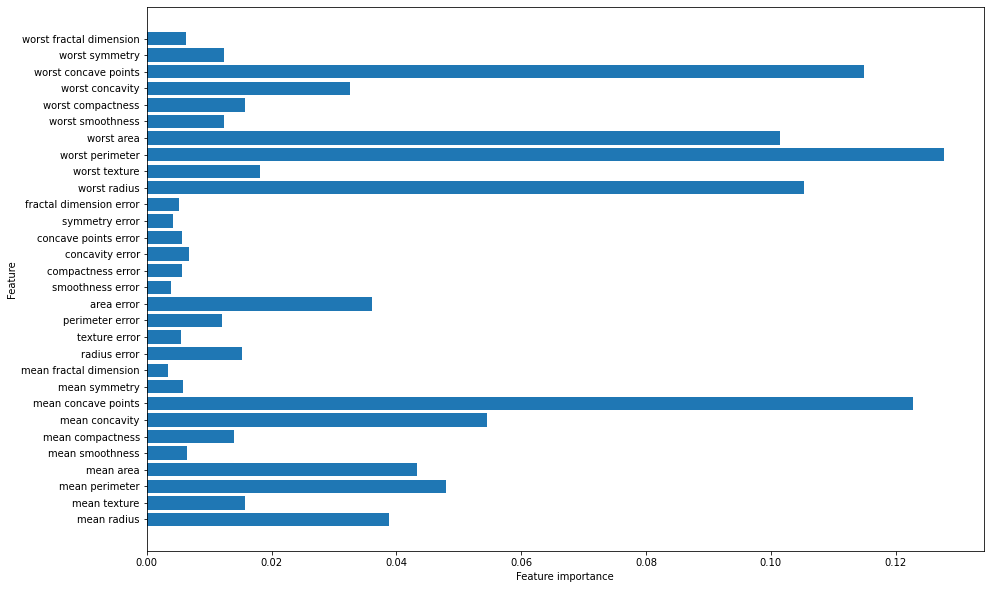

In [6]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()
plot_feature_importances_cancer(cancer_random_forest)